In [1]:
import pandas as pd
from psifr import fr
from cfr import task
csv_file = '/Users/morton/PycharmProjects/cmr_cfr/data/MortEtal13.csv'

In [2]:
data = task.read_free_recall(csv_file)
data

,subject,list,item,input,output,study,recall,repeat,intrusion,session,list_type,list_category,category
0,1,1,TOWEL,1.0,13.0,True,True,0,False,1,pure,obj,obj
1,1,1,LADLE,2.0,NaN,True,False,0,False,1,pure,obj,obj
2,1,1,THERMOS,3.0,NaN,True,False,0,False,1,pure,obj,obj
3,1,1,LEGO,4.0,18.0,True,True,0,False,1,pure,obj,obj
4,1,1,BACKPACK,5.0,10.0,True,True,0,False,1,pure,obj,obj
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47420,47,48,ALEX RODRIGUEZ,20.0,6.0,True,True,0,False,3,mixed,mixed,cel
47421,47,48,AL PACINO,21.0,4.0,True,True,0,False,3,mixed,mixed,cel
47422,47,48,NELSON MANDELA,22.0,3.0,True,True,0,False,3,mixed,mixed,cel
47423,47,48,VIN DIESEL,23.0,2.0,True,True,0,False,3,mixed,mixed,cel


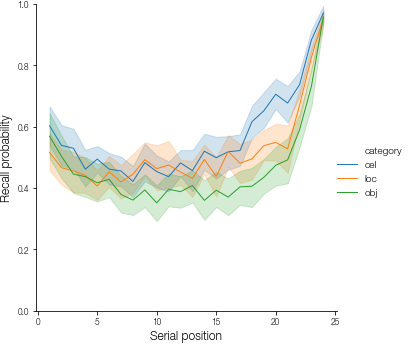

In [3]:
mixed = data.query('list_type == "mixed"')
recall = mixed.groupby('category').apply(fr.spc)
g = fr.plot_spc(recall, hue='category');
g.set(ylim=(0, 1));

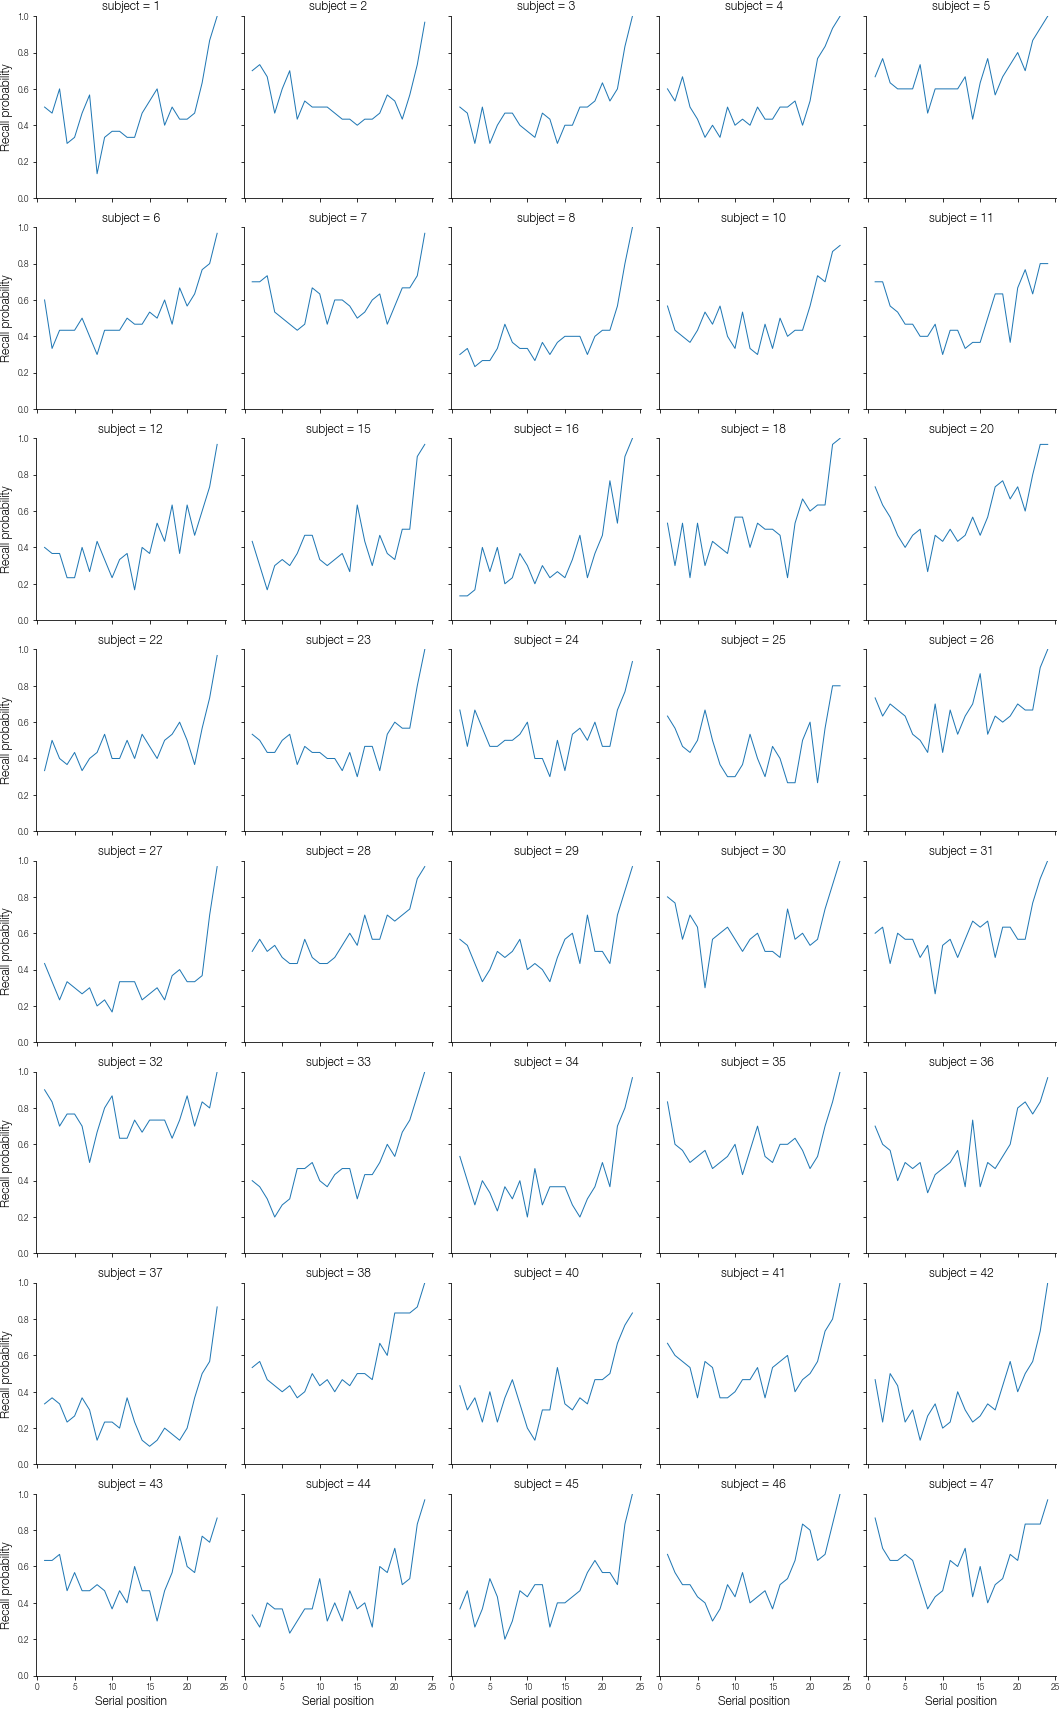

In [4]:
recall = fr.spc(mixed)
g = fr.plot_spc(recall, col='subject', col_wrap=5, height=3);
g.set(ylim=(0, 1));

In [5]:
import importlib
importlib.reload(task)
sim_file = '/Users/morton/PycharmProjects/cmr_cfr/data/MortEtal13_wiki2vec.mat'
sim = task.read_similarity(sim_file)

In [6]:
crp = fr.lag_crp(mixed)
crp

prob  actual  possible
subject lag                              
1       -23.0  0.033333       1        30
        -22.0  0.019608       1        51
        -21.0  0.014286       1        70
        -20.0  0.000000       0        78
        -19.0  0.023529       2        85
...                 ...     ...       ...
47       19.0  0.062500       2        32
         20.0  0.090909       2        22
         21.0  0.076923       1        13
         22.0  0.100000       1        10
         23.0  0.000000       0         4

[1880 rows x 3 columns]

In [7]:
from psifr import transitions
importlib.reload(transitions)
crp = fr.category_crp(mixed, 'category')

In [8]:
importlib.reload(transitions)
categories = mixed['category'].cat.categories
cat_crp = [fr.category_crp(mixed, 'category', test_key='category', 
                           test=lambda x, y: x == category)
           for category in categories]
crp = pd.concat(cat_crp, keys=categories, axis=0)
crp.index = crp.index.set_names('category', level=0)

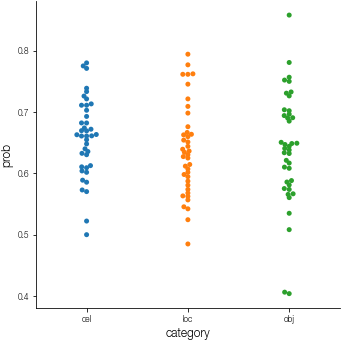

In [9]:
import seaborn as sns
sns.catplot(kind='swarm', x='category', y='prob', data=crp.reset_index())

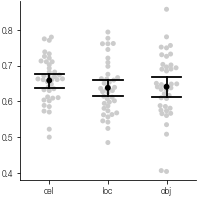

In [21]:
g = sns.FacetGrid(data=crp.reset_index())
g.map_dataframe(sns.swarmplot, x='category', y='prob', 
                color=[.8] * 3, zorder=1)
g.map_dataframe(sns.pointplot, x='category', y='prob', 
                color='k', join=False, capsize=.5)

In [27]:
crp.reset_index()['prob']

0      0.682171
1      0.632653
2      0.572917
3      0.711111
4      0.780142
         ...   
115    0.703704
116    0.566667
117    0.608247
118    0.649123
119    0.644068
Name: prob, Length: 120, dtype: float64

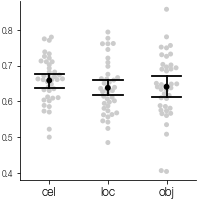

In [35]:
importlib.reload(fr)
g = fr.plot_swarm_error(data=crp.reset_index(), x='category', y='prob',
                        swarm_color=[.8] * 3)
g.ax.tick_params(axis='x', labelsize='large')

In [14]:
#sns.swarmplot?
sns.pointplot?
#import matplotlib.pyplot as plt
#plt.scatter?

Signature:
sns.pointplot(
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    estimator=<function mean at 0x10623edc0>,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    markers='o',
    linestyles='-',
    dodge=False,
    join=True,
    scale=1,
    orient=None,
    color=None,
    palette=None,
    errwidth=None,
    capsize=None,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and confidence intervals using scatter plot glyphs.

A point plot represents an estimate of central tendency for a numeric
variable by the position of scatter plot points and provides some
indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons
between different levels of one or more categorical variables. They are
particularly adept at showing interactions: how the relationship between
levels of one categorical variable changes across levels of a second
categ